In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from IPython.display import display
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [17]:
# Read the data
df = pd.read_csv('../player_game_statistics.csv')

In [18]:
display(df.head(50))

,player_name,game_name,total_games_played,total_wins,total_losses,total_moves,total_time_played_minutes,win_ratio,age,gender,country,is_churned,player_level,engagement_level,win_probability
0,David Ali,battleship,37,21,16,1766,919,56.76,64,Male,South Korea,0,intermediate,73.18,0.5676
1,Mohammed Ali,battleship,88,44,44,4267,2416,50.00,51,Male,Japan,0,intermediate,100.00,0.5000
2,Amir Nguyen,battleship,136,42,94,6592,3597,30.88,18,Male,USA,0,intermediate,100.00,0.3088
3,Sophia Brown,battleship,120,86,34,6016,3259,71.67,43,Male,Brazil,0,expert,100.00,0.7167
4,Elena Garcia,reversi,19,3,16,249,244,15.79,64,Male,Japan,0,intermediate,52.48,0.1579
5,John Tanaka,reversi,2,1,1,6,18,50.00,51,Male,China,1,novice,41.16,0.5000
6,John Liu,battleship,106,29,77,5086,2936,27.36,32,Male,China,0,intermediate,100.00,0.2736
7,Carlos Tanaka,battleship,123,39,84,5765,3180,31.71,27,Male,Brazil,0,intermediate,100.00,0.3171
8,Haruto Davis,chess,89,25,59,4186,3545,28.09,50,Male,USA,0,intermediate,100.00,0.2809
9,Raj Williams,chess,28,15,13,1320,1152,53.57,18,Male,Canada,0,intermediate,74.24,0.5357


In [19]:
# Data Preprocessing for Win Probability Prediction
# Convert categorical variables
gender_encoder = LabelEncoder()
country_encoder = LabelEncoder()
game_encoder = LabelEncoder()
level_encoder = LabelEncoder()
df['gender_encoded'] = gender_encoder.fit_transform(df['gender'])
df['country_encoded'] = country_encoder.fit_transform(df['country'])
df['game_encoded'] = game_encoder.fit_transform(df['game_name'])
df['player_level_encoded'] = level_encoder.fit_transform(df['player_level'])

# Select features for win probability prediction
features = ['total_games_played', 'total_moves', 'total_wins', 'total_losses',
           'player_level_encoded', 'gender_encoded', 'country_encoded', 'age', 'game_encoded']

X = df[features]
y = df['win_probability']  # Using the existing win_probability column

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'SVR': SVR(kernel='rbf')
}



Random Forest Results:
RMSE: 0.0431
MAE: 0.0234
R2 Score: 0.9362
Cross-validation R2 scores mean: 0.9645


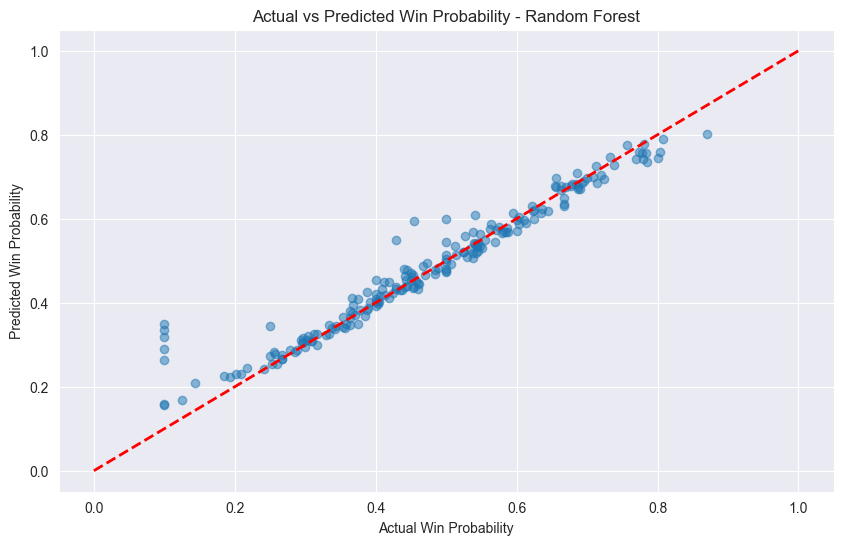


Gradient Boosting Results:
RMSE: 0.0372
MAE: 0.0212
R2 Score: 0.9526
Cross-validation R2 scores mean: 0.9739


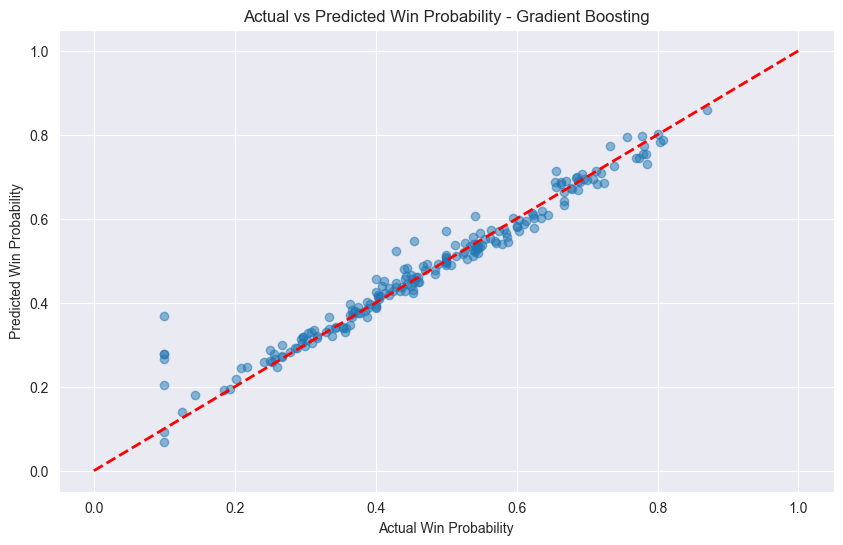


Linear Regression Results:
RMSE: 0.1065
MAE: 0.0685
R2 Score: 0.6106
Cross-validation R2 scores mean: 0.6819


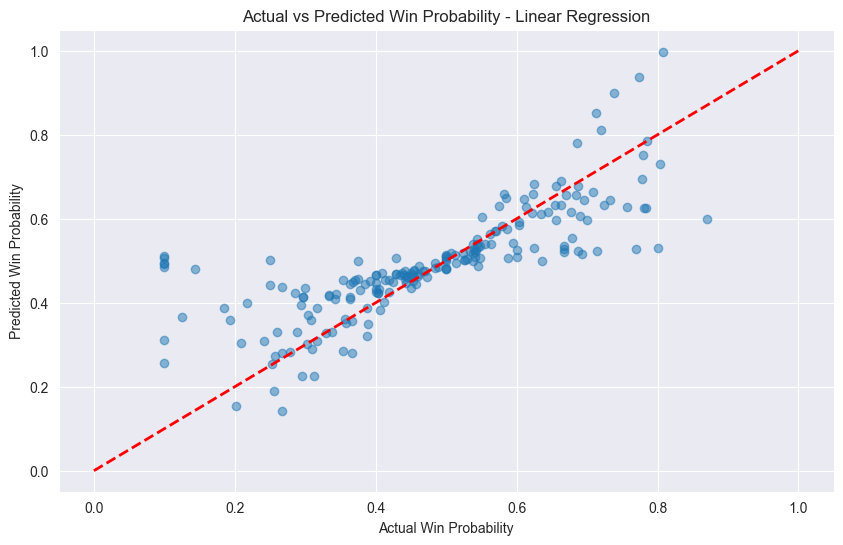


SVR Results:
RMSE: 0.0849
MAE: 0.0553
R2 Score: 0.7527
Cross-validation R2 scores mean: 0.7534


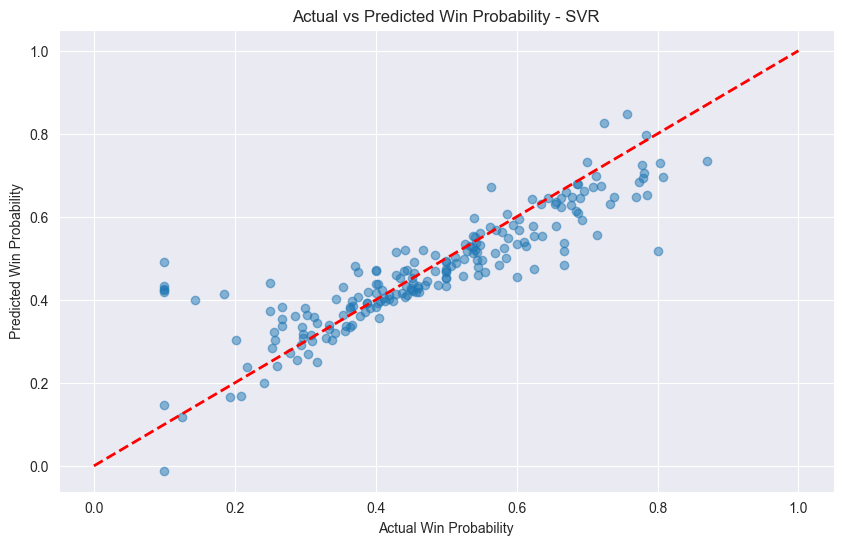

In [23]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # # Ensure predictions are between 0 and 1
    # y_pred = np.clip(y_pred, 0, 1)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    results[name]['CV Scores'] = cv_scores
    
    print(f"\n{name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Cross-validation R2 scores mean: {cv_scores.mean():.4f}")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([0, 1], [0, 1], 'r--', lw=2)
    plt.xlabel('Actual Win Probability')
    plt.ylabel('Predicted Win Probability')
    plt.title(f'Actual vs Predicted Win Probability - {name}')
    plt.show()

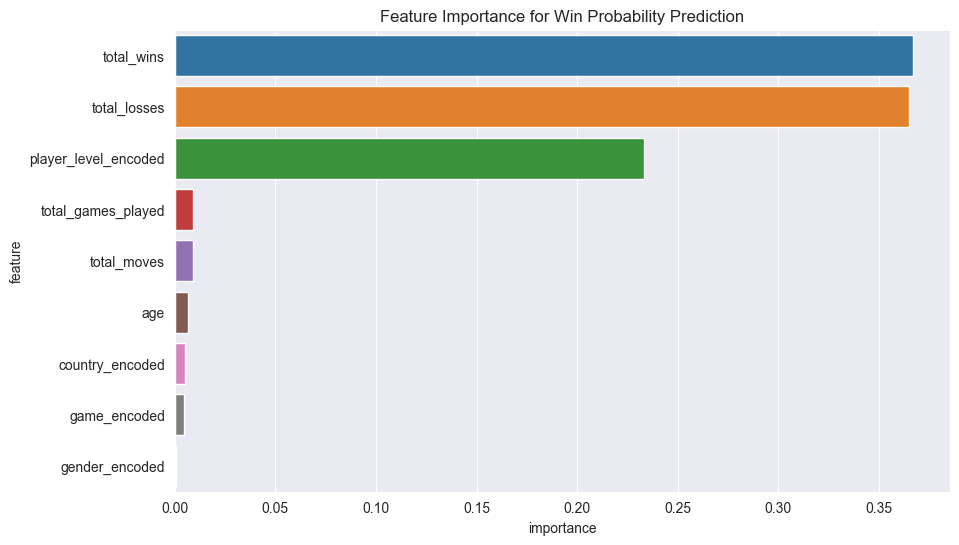

In [24]:
# Feature Importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance for Win Probability Prediction')
plt.show()


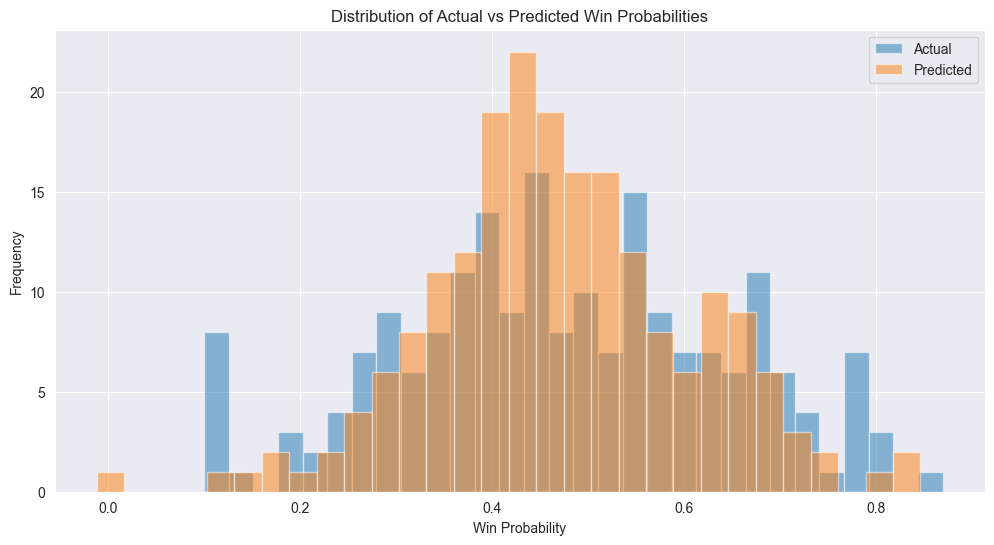

In [25]:
# Distribution of predictions vs actual values
plt.figure(figsize=(12, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted')
plt.xlabel('Win Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Win Probabilities')
plt.legend()
plt.show()

In [26]:
# Select the best model based on R2 scores from cross-validation
best_model_name = max(results, key=lambda x: np.mean(results[x]['CV Scores']))
best_model = models[best_model_name]
best_cv_score = np.mean(results[best_model_name]['CV Scores'])

print(f"\nBest Model: {best_model_name}")
print(f"Best Cross-validation R2 Score: {best_cv_score:.4f}")



Best Model: Gradient Boosting
Best Cross-validation R2 Score: 0.9739


In [27]:
# Save the model and preprocessing objects
with open('../models/win_probability_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('../models/win_probability_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save encoders
encoder_dict = {
    'gender_encoder': gender_encoder,
    'country_encoder': country_encoder,
    'game_encoder': game_encoder,
    'level_encoder': level_encoder
}

with open('../models/win_probability_encoders.pkl', 'wb') as f:
    pickle.dump(encoder_dict, f)

In [28]:
# Function to load the saved models
def load_win_probability_model():
    """Load the saved win probability model and preprocessing objects"""
    with open('../models/win_probability_model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    with open('../models/win_probability_scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    
    with open('../models/win_probability_encoders.pkl', 'rb') as f:
        encoders = pickle.load(f)
    
    return model, scaler, encoders

In [29]:
# Function to make predictions
def predict_win_probability(data, model, scaler, encoders):
    """
    Make win probability predictions on new data
    
    Parameters:
    data (pd.DataFrame): DataFrame containing the required features
    model: Loaded model
    scaler: Loaded scaler
    encoders: Dictionary of loaded encoders
    
    Returns:
    np.array: Predicted win probabilities
    """
    # Preprocess the data
    data_processed = data.copy()
    
    # Encode categorical variables
    data_processed['gender_encoded'] = encoders['gender_encoder'].transform(data_processed['gender'])
    data_processed['country_encoded'] = encoders['country_encoder'].transform(data_processed['country'])
    data_processed['game_encoded'] = encoders['game_encoder'].transform(data_processed['game_name'])
    data_processed['player_level_encoded'] = encoders['level_encoder'].transform(data_processed['player_level'])
    
    # Select and scale features
    features = ['total_games_played', 'total_moves', 'total_wins', 'total_losses',
           'player_level_encoded', 'gender_encoded', 'country_encoded', 'age', 'game_encoded']
    X = data_processed[features]
    X_scaled = scaler.transform(X)
    
    # Make predictions and clip to [0,1] range
    predictions = model.predict(X_scaled)
    predictions = np.clip(predictions, 0, 1)
    
    return predictions

In [30]:
# Load model and components
model, scaler, encoders = load_win_probability_model()

# Create test data
test_data = pd.DataFrame({
    'total_games_played': [37, 88],
    'total_moves': [1766, 4267],
    'total_wins': [21, 44],
    'total_losses': [16, 44],
    'player_level': ['intermediate', 'expert'],
    'gender': ['Male', 'Male'],
    'country': ['South Korea', 'Japan'],
    'game_name': ['battleship', 'battleship'],
    'age': [64, 51]
})

# Make predictions
predictions = predict_win_probability(test_data, model, scaler, encoders)

# Print results
for i, pred in enumerate(predictions):
    print(f"\nPlayer {i+1}:")
    print(f"Games Played: {test_data['total_games_played'].iloc[i]}")
    print(f"Total Moves: {test_data['total_moves'].iloc[i]}")
    print(f"Wins/Losses: {test_data['total_wins'].iloc[i]}/{test_data['total_losses'].iloc[i]}")
    print(f"Win Rate: {(test_data['total_wins'].iloc[i] / test_data['total_games_played'].iloc[i]):.2f}")
    print(f"Player Level: {test_data['player_level'].iloc[i]}")
    print(f"Predicted Win Probability: {pred:.2f}")
    print("-" * 30)


Player 1:
Games Played: 37
Total Moves: 1766
Wins/Losses: 21/16
Win Rate: 0.57
Player Level: intermediate
Predicted Win Probability: 0.52
------------------------------

Player 2:
Games Played: 88
Total Moves: 4267
Wins/Losses: 44/44
Win Rate: 0.50
Player Level: expert
Predicted Win Probability: 0.56
------------------------------
